<a href="https://colab.research.google.com/github/sharunraj14/ICT_Projects/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

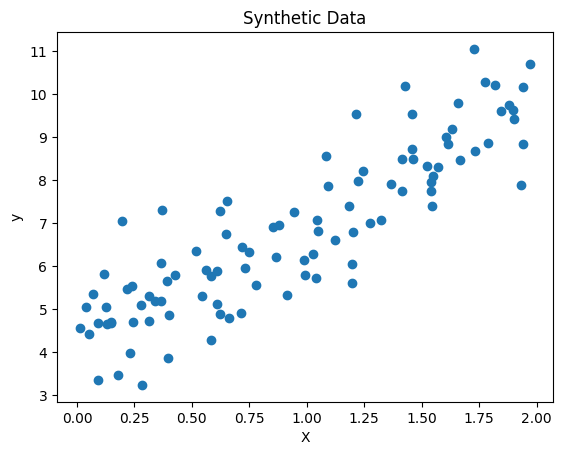

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [2]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training shapes: {X_train.shape}, {y_train.shape}")
print(f"Testing shapes: {X_test.shape}, {y_test.shape}")

Training shapes: (75, 1), (75, 1)
Testing shapes: (25, 1), (25, 1)


## Do the Linear Regression with Scikit-Learn Library

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import pandas as pd

#  Standard Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)



## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [4]:
# Ridge and Lasso
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# Evaluation Table
models = {"Linear": lr_model, "Ridge": ridge, "Lasso": lasso}
results = []

for name, model in models.items():
    pred = model.predict(X_test)
    results.append({
        "Model": name,
        "R2-Score": r2_score(y_test, pred),
        "MAPE": mean_absolute_percentage_error(y_test, pred)
    })

df_results = pd.DataFrame(results)
print(df_results)

    Model  R2-Score      MAPE
0  Linear  0.831099  0.084757
1   Ridge  0.825999  0.082412
2   Lasso  0.809082  0.082640


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here: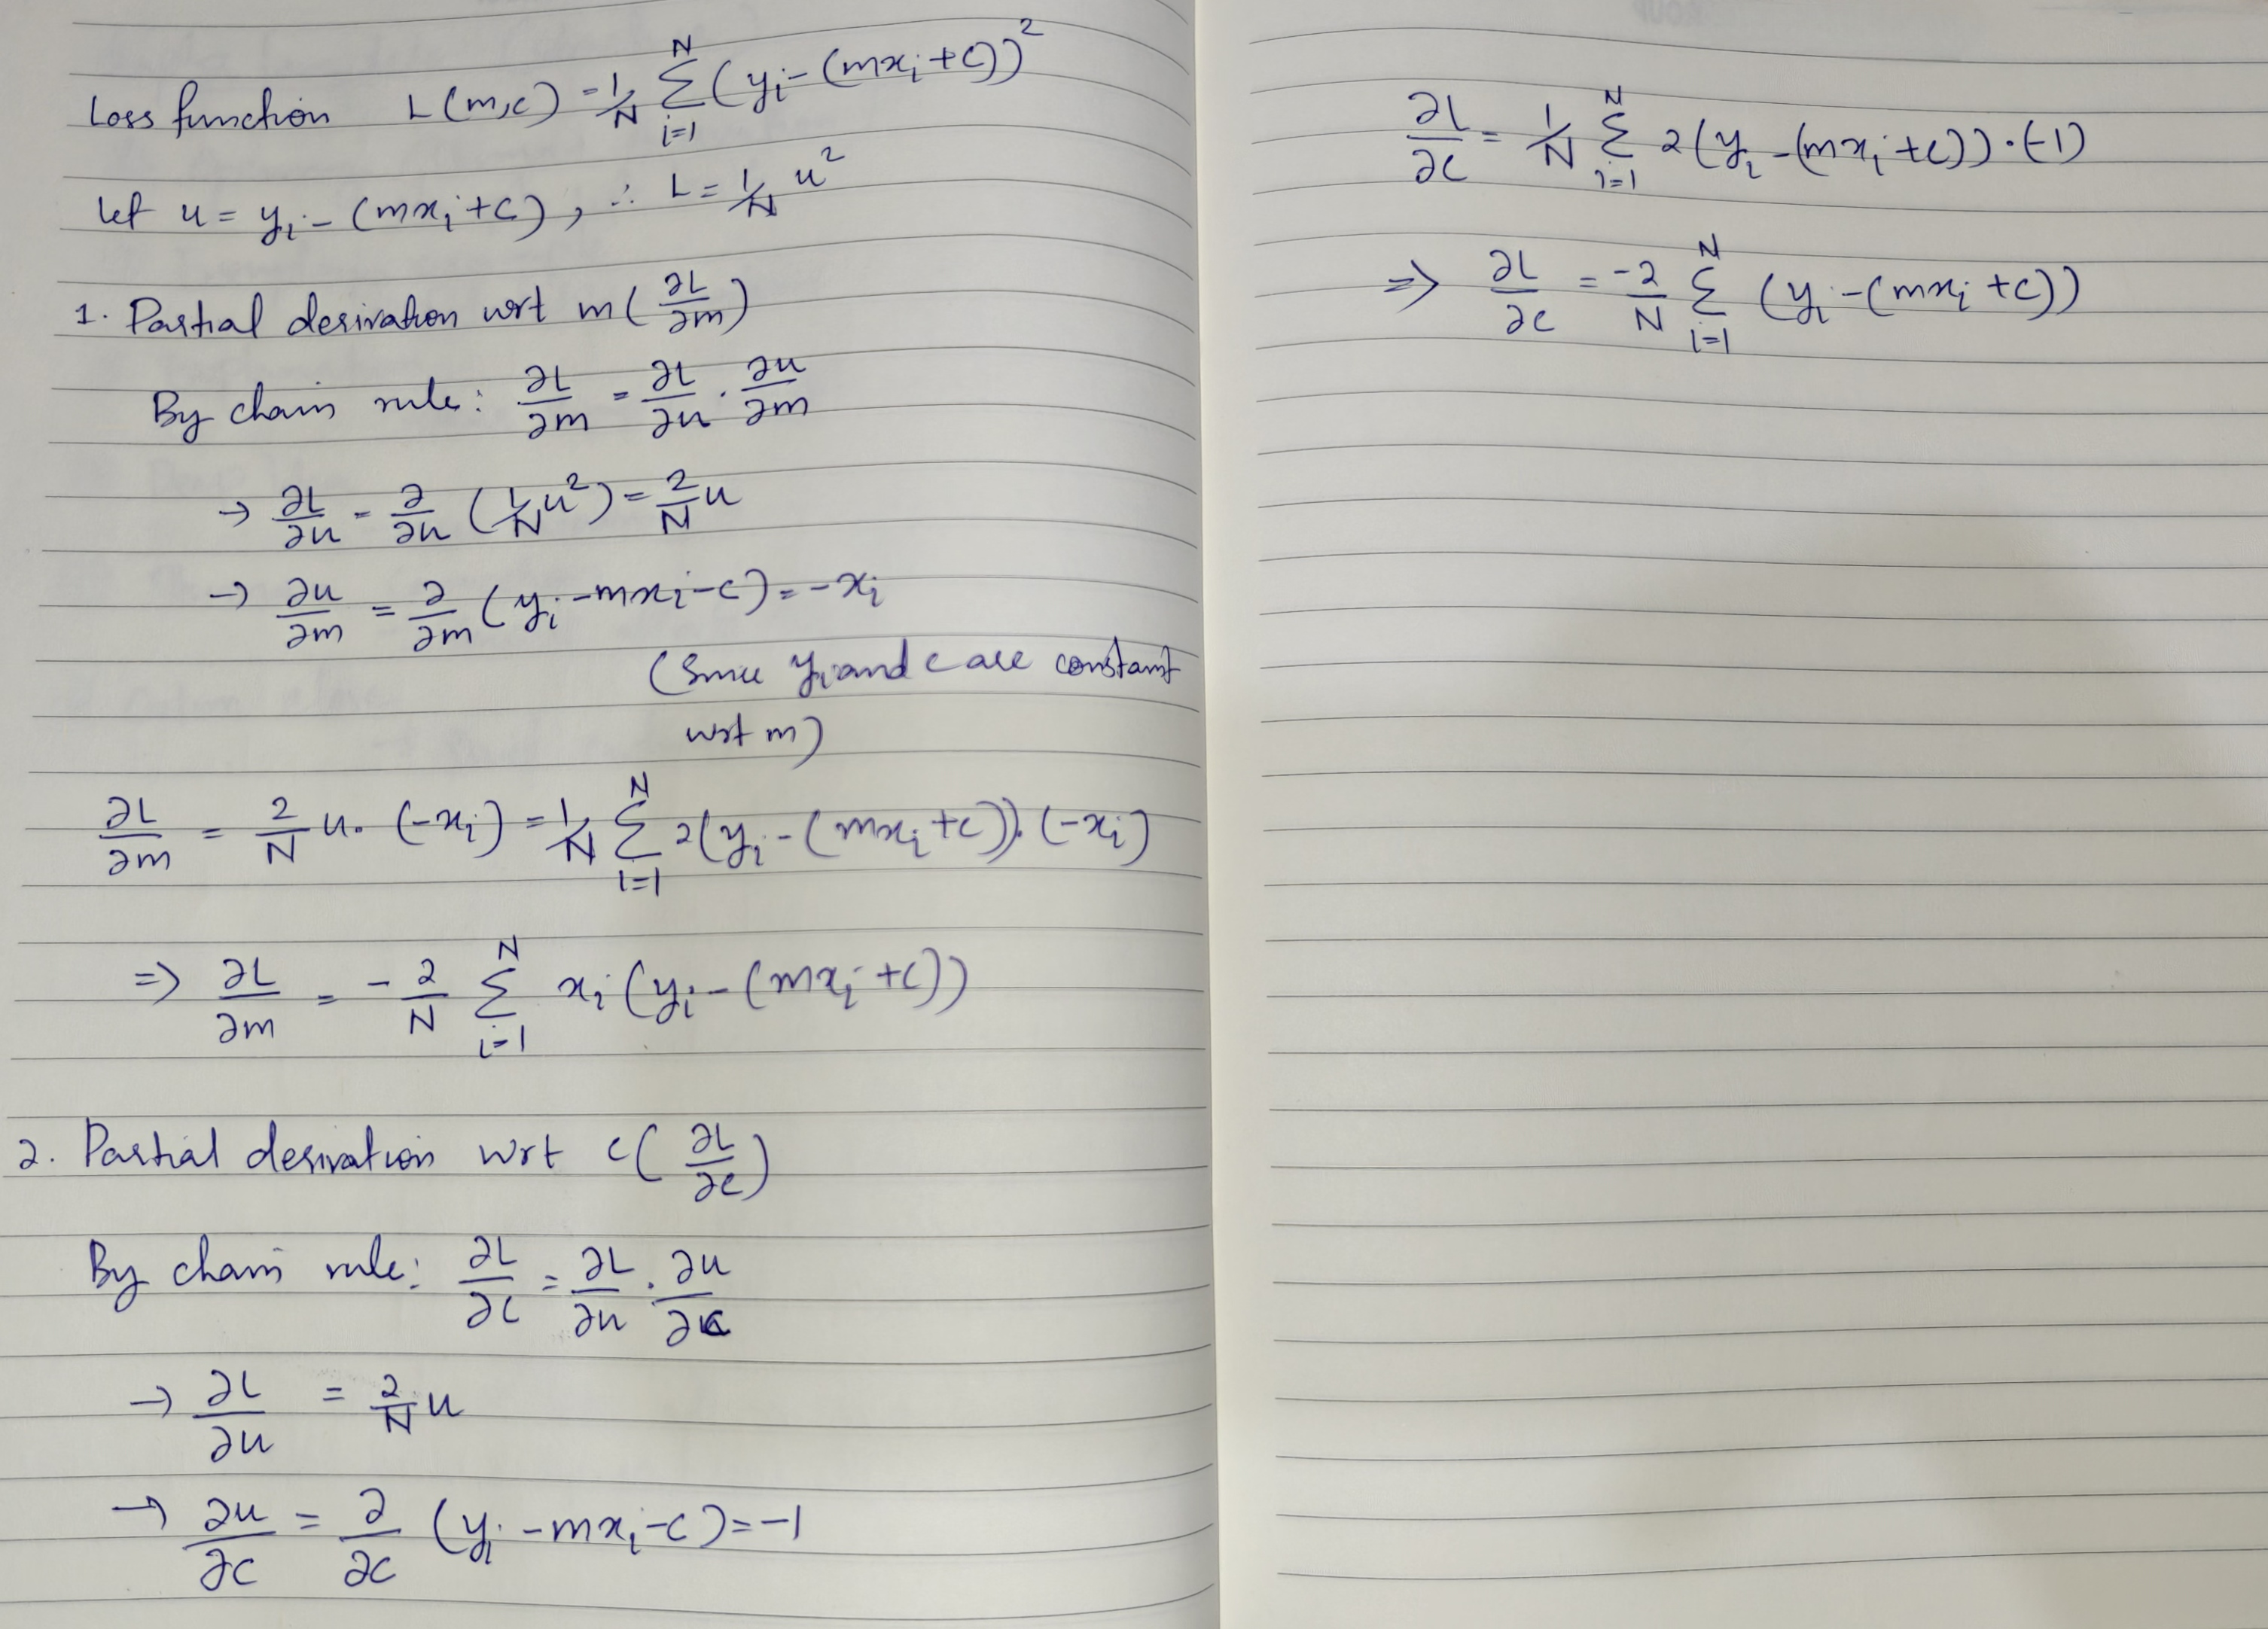

## 🧠 Custom Linear Regression Class

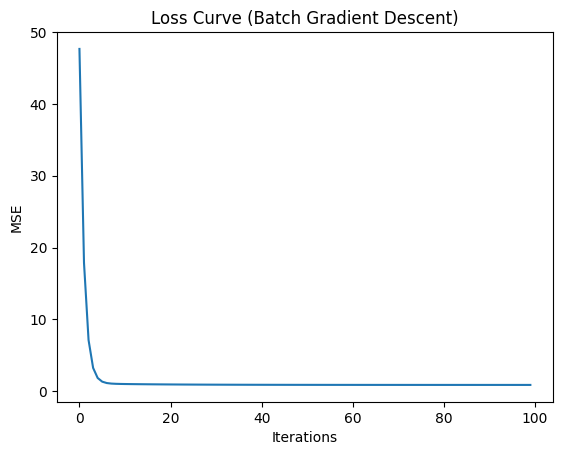

In [5]:
class MyLinearRegression:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        N = len(y)
        self.m = 0
        self.c = 0

        for _ in range(n_iters):
            y_pred = self.m * X + self.c
            # Calculate gradients
            dm = (2/N) * np.sum((y_pred - y) * X)
            dc = (2/N) * np.sum(y_pred - y)

            # Update weights
            self.m -= lr * dm
            self.c -= lr * dc

            # Record loss
            loss = np.mean((y - y_pred)**2)
            self.loss_history.append(loss)

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)

# --- Training and Loss Curve ---
custom_model = MyLinearRegression()
custom_model.fit(X_train, y_train, lr=0.1, n_iters=100)

plt.plot(custom_model.loss_history)
plt.title("Loss Curve (Batch Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

## 🔁 Train the Model and Visualize the Fit

In [6]:
class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=100):
        N = len(y)
        for _ in range(n_iters):
            for i in range(N):
                # Pick a random point (optional, but standard for SGD)
                idx = np.random.randint(0, N)
                xi = X[idx]
                yi = y[idx]

                prediction = self.m * xi + self.c
                dm = 2 * (prediction - yi) * xi
                dc = 2 * (prediction - yi)

                self.m -= lr * dm
                self.c -= lr * dc

                # Calculate total MSE for logging
                current_loss = np.mean((y - (self.m * X + self.c))**2)
                self.loss_history.append(current_loss)



## 📉 Plot the Loss Curve

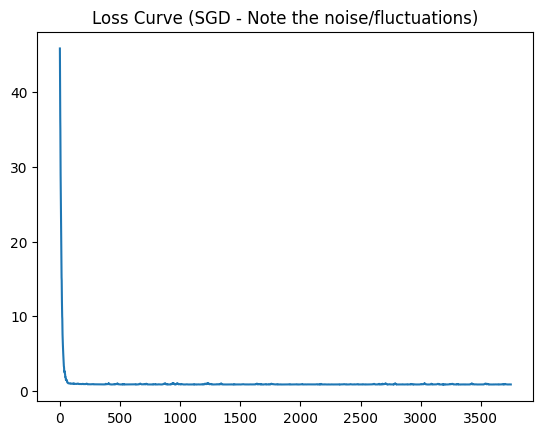

In [7]:
# Train and Plot SGD
sgd_model = MyLinearRegressionSGD()
sgd_model.fit(X_train, y_train, lr=0.01, n_iters=50)

plt.plot(sgd_model.loss_history)
plt.title("Loss Curve (SGD - Note the noise/fluctuations)")
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [8]:
class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=100):
        N = len(y)
        for _ in range(n_iters):
            for i in range(N):
                # Pick a random point (optional, but standard for SGD)
                idx = np.random.randint(0, N)
                xi = X[idx]
                yi = y[idx]

                prediction = self.m * xi + self.c
                dm = 2 * (prediction - yi) * xi
                dc = 2 * (prediction - yi)

                self.m -= lr * dm
                self.c -= lr * dc

                # Calculate total MSE for logging
                current_loss = np.mean((y - (self.m * X + self.c))**2)
                self.loss_history.append(current_loss)



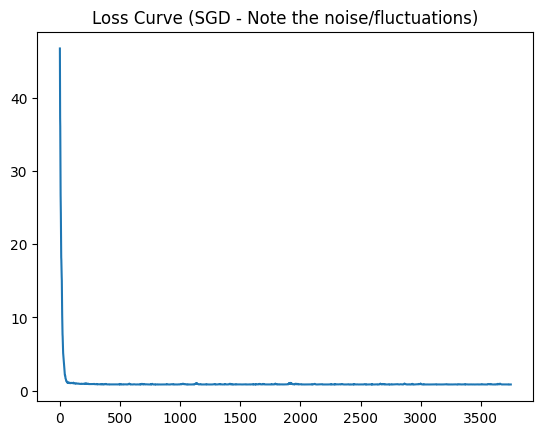

In [9]:
# Train and Plot SGD
sgd_model = MyLinearRegressionSGD()
sgd_model.fit(X_train, y_train, lr=0.01, n_iters=50)

plt.plot(sgd_model.loss_history)
plt.title("Loss Curve (SGD - Note the noise/fluctuations)")
plt.show()

## Visualize the prediction result of Library version and Custom regression code created

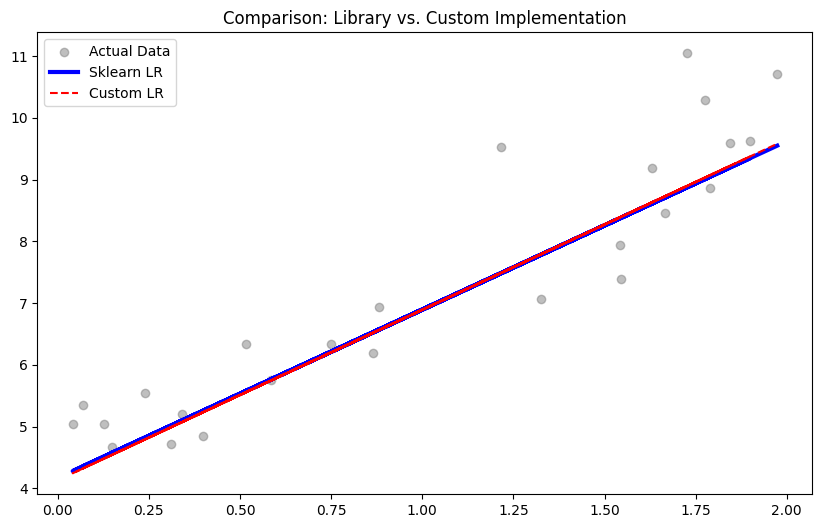

Sklearn Coeffs: 2.7259, 4.1688
Custom Coeffs:  2.7603, 4.1313


In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred_lr, color='blue', linewidth=3, label="Sklearn LR")
plt.plot(X_test, custom_model.predict(X_test), color='red', linestyle='--', label="Custom LR")
plt.legend()
plt.title("Comparison: Library vs. Custom Implementation")
plt.show()

print(f"Sklearn Coeffs: {lr_model.coef_[0][0]:.4f}, {lr_model.intercept_[0]:.4f}")
print(f"Custom Coeffs:  {custom_model.m:.4f}, {custom_model.c:.4f}")

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version